<a href="https://colab.research.google.com/github/mazls/TinyML_Tests/blob/main/TinyML_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# TensorFlow is an open source machine learning library
#!pip install tensorflow==2.0
import tensorflow as tf
# NumPy is a math library
import numpy as np
# Matplotlib is a graphing library
import matplotlib.pyplot as plt
# math is Python's math library
import math

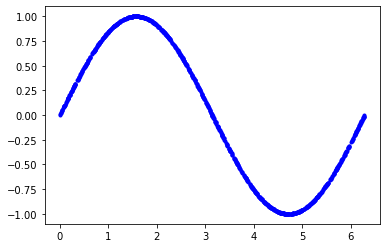

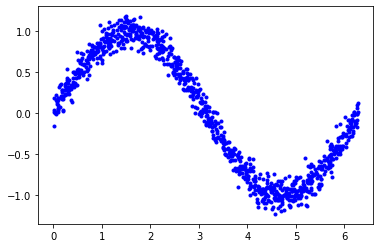

In [3]:
# We'll generate this many sample datapoints
SAMPLES = 1000

# Set a "seed" value, so we get the same random numbers each time we run this
# notebook. Any number can be used here.
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2π, which covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

# Shuffle the values to guarantee they're not in order
np.random.shuffle(x_values)

# Calculate the corresponding sine values
y_values = np.sin(x_values)

# Plot our data. The 'b.' argument tells the library to print blue dots.
plt.plot(x_values, y_values, 'b.')
plt.show()

# Add a small random number to each y value
y_values += 0.1 * np.random.randn(*y_values.shape)

# Plot our data
plt.plot(x_values, y_values, 'b.')
plt.show()

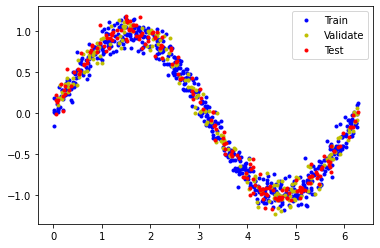

In [4]:
# We'll use 60% of our data for training and 20% for testing. The remaining 20%
# will be used for validation. Calculate the indices of each section.
TRAIN_SPLIT =  int(0.6 * SAMPLES)
TEST_SPLIT = int(0.2 * SAMPLES + TRAIN_SPLIT)

# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Double check that our splits add up correctly
assert (x_train.size + x_validate.size + x_test.size) ==  SAMPLES

# Plot the data in each partition in different colors:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

In [9]:
# We'll use Keras to create a simple model architecture
from tensorflow import keras
from tensorflow.keras import layers
model_1 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# Final layer is a single neuron, since we want to output a single value
model_1.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Print a summary of the model's architecture
model_1.summary()

model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))
#activation = activation_function((input * weight) + bias)
def relu(input):
    return max(0.0, input)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [10]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 1s 6ms/step - loss: 0.7474 - mae: 0.7450 - val_loss: 0.6871 - val_mae: 0.7268
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.6055 - mae: 0.6897 - val_loss: 0.5839 - val_mae: 0.6778
Epoch 3/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.5236 - mae: 0.6462 - val_loss: 0.5245 - val_mae: 0.6423
Epoch 4/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4889 - mae: 0.6240 - val_loss: 0.5117 - val_mae: 0.6333
Epoch 5/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4812 - mae: 0.6185 - val_loss: 0.5045 - val_mae: 0.6282
Epoch 6/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4746 - mae: 0.6133 - val_loss: 0.4978 - val_mae: 0.6225
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.4682 - mae: 0.6080 - val_loss: 0.4902 - val_mae: 0.6160
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.

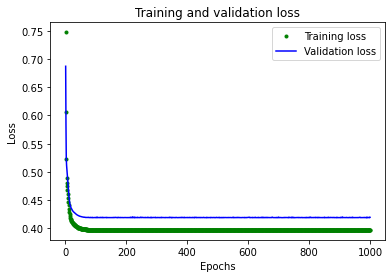

In [12]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

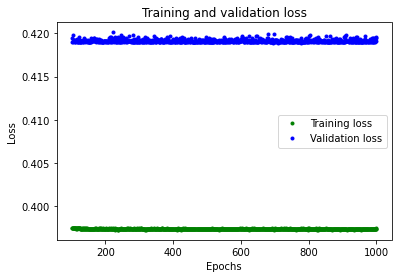

In [20]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

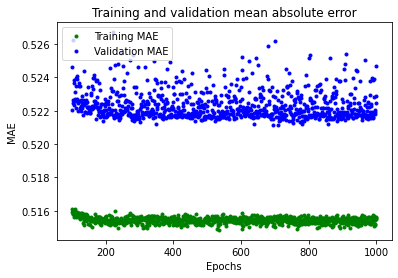

In [21]:
# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

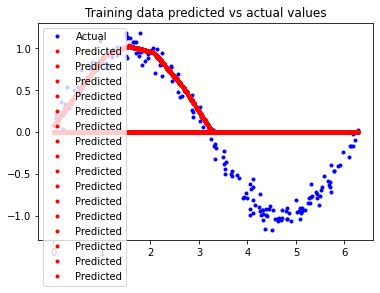

In [22]:
# Use the model to make predictions from our validation data
predictions = model_1.predict(x_train)

# Plot the predictions along with the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

In [23]:
model_2 = tf.keras.Sequential()

# First layer takes a scalar input and feeds it through 16 "neurons." The
# neurons decide whether to activate based on the 'relu' activation function.
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))

# The new second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))

# Final layer is a single neuron, since we want to output a single value
model_2.add(layers.Dense(1))

# Compile the model using a standard optimizer and loss function for regression
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

# Show a summary of the model
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_13 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [24]:
history_2 = model_2.fit(x_train, y_train, epochs=600, batch_size=16,
                     validation_data=(x_validate, y_validate))

Epoch 1/600
38/38 [==============================] - 1s 4ms/step - loss: 0.6222 - mae: 0.6493 - val_loss: 0.3640 - val_mae: 0.5213
Epoch 2/600
38/38 [==============================] - 0s 2ms/step - loss: 0.3208 - mae: 0.4928 - val_loss: 0.3176 - val_mae: 0.4806
Epoch 3/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2735 - mae: 0.4557 - val_loss: 0.2684 - val_mae: 0.4463
Epoch 4/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2377 - mae: 0.4248 - val_loss: 0.2352 - val_mae: 0.4167
Epoch 5/600
38/38 [==============================] - 0s 2ms/step - loss: 0.2121 - mae: 0.4022 - val_loss: 0.2072 - val_mae: 0.3900
Epoch 6/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1918 - mae: 0.3803 - val_loss: 0.1964 - val_mae: 0.3709
Epoch 7/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1814 - mae: 0.3663 - val_loss: 0.1883 - val_mae: 0.3683
Epoch 8/600
38/38 [==============================] - 0s 2ms/step - loss: 0.1743 - m

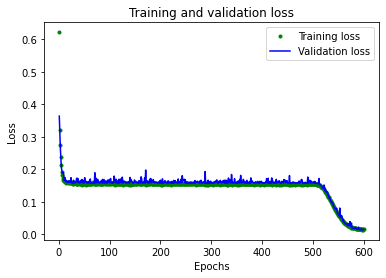

In [25]:
# Draw a graph of the loss, which is the distance between
# the predicted and actual values during training and validation.
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

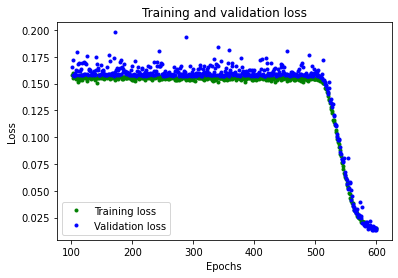

In [26]:
# Exclude the first few epochs so the graph is easier to read
SKIP = 100

plt.clf()

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

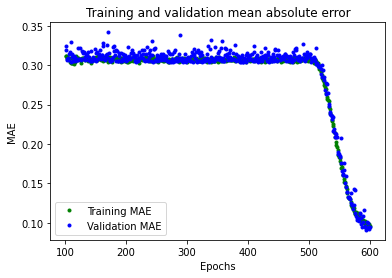

In [27]:
plt.clf()

# Draw a graph of mean absolute error, which is another way of
# measuring the amount of error in the prediction.
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

7/7 [==============================] - 0s 2ms/step - loss: 0.0140 - mae: 0.0931


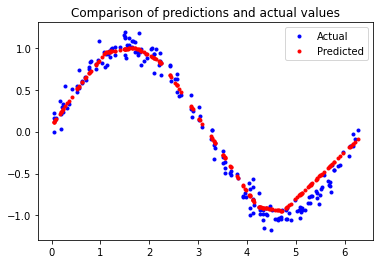

In [28]:
# Calculate and print the loss on our test dataset
loss = model_2.evaluate(x_test, y_test)

# Make predictions based on our test dataset
predictions = model_2.predict(x_test)

# Graph the predictions against the actual values
plt.clf()
plt.title('Comparison of predictions and actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()